Import some libraries that will be used

In [62]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Prepare the digit dataset

In [63]:
(x_digit_train, y_digit_train), (x_digit_test, y_digit_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
#x_digit_train = x_digit_train.astype("float32") / 255
#x_digit_test = x_digit_test.astype("float32") / 255

x_digit_train = x_digit_train.reshape(-1, 28*28)
x_digit_test = x_digit_test.reshape(-1, 28*28)

In [64]:
x_digit_train.shape

(60000, 784)

Prepare the letter dataset

In [65]:
df = pd.read_csv('A_Z Handwritten Data.csv')

In [66]:
# labels: column '0', pixels: rest
x_letter = df.drop('0', axis=1)
y_letter = df['0']

x_letter_train, x_letter_test, y_letter_train, y_letter_test = train_test_split(x_letter, y_letter, test_size = 0.2)

x_letter_train = x_letter_train.to_numpy()
x_letter_test = x_letter_test.to_numpy()

# Scale images to the [0, 1] range
#x_letter_train = x_letter_train.astype("float32")/255
#x_letter_test = x_letter_test.astype("float32")/255

In [67]:
x_letter_train.shape

(297960, 784)

Merge data

In [68]:
x_train = np.concatenate((x_digit_train, x_letter_train))
x_test = np.concatenate((x_digit_test, x_letter_test))

In [69]:
y_train = np.concatenate((y_digit_train, y_letter_train.to_numpy()+10))
y_test = np.concatenate((y_digit_test, y_letter_test.to_numpy()+10))

Plotting the number of characters in the dataset

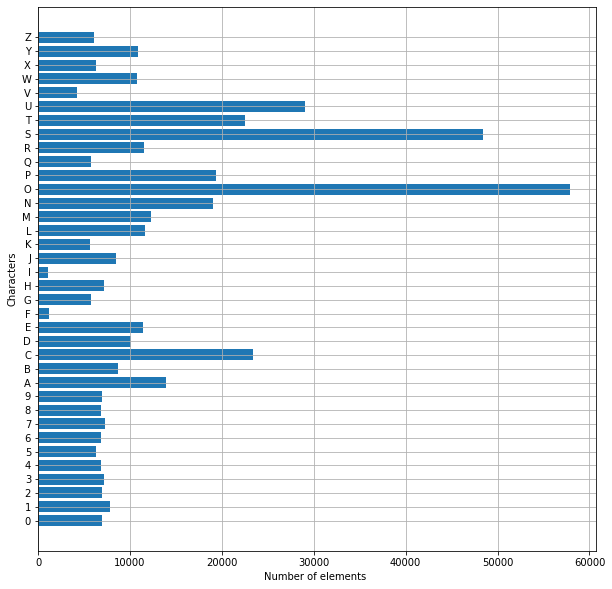

In [70]:
character_label = {
    0:'0',1:'1',2:'2',3:'3',4:'4',
    5:'5',6:'6',7:'7',8:'8',9:'9',
    10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
    16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',
    22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',
    28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'
}

label_count = np.zeros((36, ))

for y in np.concatenate((y_train, y_test)):
    label_count[y] += 1

labels = []
for x in character_label.values():
    labels.append(x)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(labels, label_count)
plt.xlabel("Number of elements ")
plt.ylabel("Characters")
plt.grid()
plt.show()
    

Reshape data

In [71]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 36)
y_test = keras.utils.to_categorical(y_test, 36)

Build model

In [72]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding = 'valid'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(36, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

Compile and train the model

In [73]:
batch_size = 100
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
2864/2864 [==============================] - 190s 66ms/step - loss: 0.5035 - accuracy: 0.8578 - val_loss: 0.1125 - val_accuracy: 0.9722
Epoch 2/3
2864/2864 [==============================] - 147s 51ms/step - loss: 0.1936 - accuracy: 0.9416 - val_loss: 0.0946 - val_accuracy: 0.9760
Epoch 3/3
2864/2864 [==============================] - 188s 66ms/step - loss: 0.1563 - accuracy: 0.9536 - val_loss: 0.0639 - val_accuracy: 0.9830


Evalute the model

In [74]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.07833532243967056, 0.9777370095252991]

In [75]:
model.save('HandwrittenCharacterRecognition.h5')

Test model by a specific case

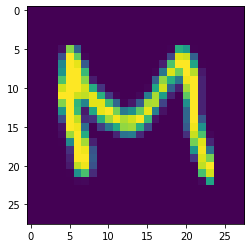

In [76]:
test_id = 70000
plt.imshow(x_test[test_id])

In [77]:
result = np.argmax(model.predict(x_test[test_id].reshape(1,28,28,1)))
character_label[result]

'M'